# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [520]:
#Import the necessary functions and packages
import pandas as pd
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import datetime
import dateutil.parser as parser
from scipy import stats
from sklearn import datasets, linear_model


## Load the data into a DataFrame
df=pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
df.rename(columns={'Sale (Dollars)':'Sale'}, inplace=True)

df['Date'] = pd.to_datetime( df.Date, infer_datetime_format=True)
df.head()

#df.head()
#df["S"] = pd.to_datetime(df.Date, format='%Y%m%d', errors='coerce')

#print type( df.Date[1] )

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [521]:
def getMonthFromYear(year): return year.month
df['Month'] = df.Date.apply(getMonthFromYear)

#df.plot(kind='scatter', x='Bottle Volume (ml)', y='Bottles Sold');
#plt.show()

In [522]:
def getYearFromDate(date): return date.year


df.Month.head()
df['Year'] = df.Date.apply(getYearFromDate)



In [523]:
df['Sale'] = df.Sale.apply( lambda sale: sale.replace("$", "") ).astype(float)

In [524]:
def getSeason(year):
    if year.month in [3,4,5]:
        return 1
    elif year.month in [6,7,8]:
        return 2
    elif year.month in [9,10,11]:
        return 3
    elif year.month in [12,1,2]:
        return 4
    
df["Season"] = df.Date.apply(getSeason)
df

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Season
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,$4.50,$6.75,12,81.00,9.00,2.38,11,2015,3
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,$13.75,$20.63,2,41.26,1.50,0.40,3,2016,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,$12.59,$18.89,24,453.36,24.00,6.34,2,2016,4
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,$9.50,$14.25,6,85.50,10.50,2.77,2,2016,4
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,$7.20,$10.80,12,129.60,21.00,5.55,8,2015,2
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,1750,$13.32,$19.98,6,119.88,10.50,2.77,4,2015,1
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,750,$6.66,$9.99,3,29.97,2.25,0.59,8,2015,2
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,1750,$15.75,$23.63,2,47.26,3.50,0.92,6,2015,2
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,750,$11.49,$17.24,4,68.96,3.00,0.79,1,2016,4
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,1000,$7.62,$11.43,2,22.86,2.00,0.53,11,2015,3


In [525]:
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

In [589]:
aggregations = {
    
    "Sale" : {
        "MonthlySales" : 'sum'
    }
}

df2 = sales.groupby(["Store Number","Month"]).agg(aggregations).reset_index()

In [590]:
df2.head()

,Store Number,Month,Sale
,,,MonthlySales
0,2106,1,13567.80
1,2106,2,12873.14
2,2106,3,12846.35
3,2106,4,11957.86
4,2106,5,7526.88


In [595]:
aggregations2 = {
    
    "Bottles Sold" : {
        "BottlesSold" : 'sum'
    }
}

df3 = sales.groupby(["Store Number","Month"]).agg(aggregations2).reset_index()

In [598]:
storeNumber = df2["Store Number"]
month =df2["Month"]
bottlesSold= df3["Bottles Sold"]["BottlesSold"]
monthlySales = df2["Sale"]["MonthlySales"]

df4 = pd.DataFrame( {"StoreNumber" : storeNumber, "Monthly Sales" : monthlySales, "Month" :month, "Bottles Sold":bottlesSold} )

df4.head()

,Bottles Sold,Month,Monthly Sales,StoreNumber
0,907,1,13567.80,2106
1,959,2,12873.14,2106
2,839,3,12846.35,2106
3,1077,4,11957.86,2106
4,529,5,7526.88,2106


In [601]:
def getSeason(month):
    if month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    elif month in [12,1,2]:
        return 4
    
df4["Season"] = df4["Month"].apply(getSeason)
df4.head()

,Bottles Sold,Month,Monthly Sales,StoreNumber,Season
0,907,1,13567.80,2106,4
1,959,2,12873.14,2106,4
2,839,3,12846.35,2106,1
3,1077,4,11957.86,2106,1
4,529,5,7526.88,2106,1


In [615]:
import statsmodels.formula.api as smf

X = df4[["Bottles Sold","Season"]]
y = df4["Monthly Sales"]

results = smf.OLS(y, X).fit()
print results.summary()


                            OLS Regression Results                            
Dep. Variable:          Monthly Sales   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        03:04:49   Log-Likelihood:            -1.1985e+05
No. Observations:               14090   AIC:                         2.397e+05
Df Residuals:                   14088   BIC:                         2.397e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Bottles Sold    15.3126      0.032    483.006   

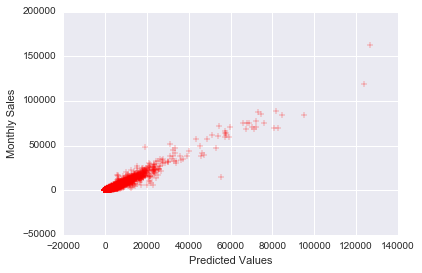

MSE: 1404814.33188
Score: 0.94264403804


In [614]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error

X = df4[["Bottles Sold","Season"]]
y = df4["Monthly Sales"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Monthly Sales")
plt.show()
print "MSE:", mean_squared_error(y, predictions)
print "Score:", model.score(X, y)  

Cross-validated scores: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
Cross-Predicted Accuracy: 1.0


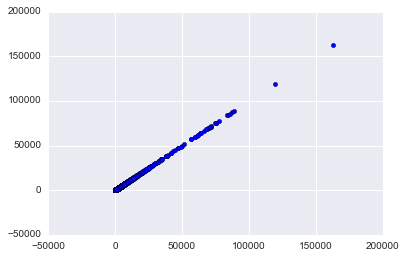

In [616]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df4, y, cv=20)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, df4, y, cv=20)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [ ]:
# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.